we will use the [ImageGenerator](https://www.tensorfl.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) class to automatically create our dataset from this train directory, using the subdirectories for classes.

Let's define each of these subdirectories:

In [88]:
import os

train_positive_dir = os.path.join('train/PNEUMONIA')

train_negative_dir = os.path.join('train/NORMAL')

valid_positive_dir = os.path.join('test/PNEUMONIA')

valid_negative_dir = os.path.join('test/NORMAL')

Now, let's see what the filenames look like in the `positive` and `negative` training directories:

In [89]:
train_positive_names = os.listdir(train_positive_dir)
print(train_positive_names[:10])

train_negative_names = os.listdir(train_negative_dir)
print(train_negative_names[:10])

validation_positive_names = os.listdir(valid_positive_dir)
print(validation_positive_names[:10])

validation_negative_names = os.listdir(valid_negative_dir)
print(validation_negative_names[:10])

['BACTERIA-4038442-0001.jpeg', 'BACTERIA-8034950-0011.jpeg', 'BACTERIA-292199-0002.jpeg', 'BACTERIA-2092977-0003.jpeg', 'BACTERIA-4407438-0002.jpeg', 'BACTERIA-8093423-0001.jpeg', 'BACTERIA-880930-0002.jpeg', 'VIRUS-3443773-0006.jpeg', 'BACTERIA-9072988-0002.jpeg', 'VIRUS-9674936-0007.jpeg']
['NORMAL-2552119-0002.jpeg', 'NORMAL-7298141-0001.jpeg', 'NORMAL-3411116-0002.jpeg', 'NORMAL-1619233-0001.jpeg', 'NORMAL-7327513-0001.jpeg', 'NORMAL-2699389-0001.jpeg', 'NORMAL-3781678-0001.jpeg', 'NORMAL-8648239-0002.jpeg', 'NORMAL-5728847-0001.jpeg', 'NORMAL-6881695-0001.jpeg']
['VIRUS-2040583-0001.jpeg', 'VIRUS-9671740-0001.jpeg', 'BACTERIA-4059589-0003.jpeg', 'BACTERIA-5141192-0002.jpeg', 'VIRUS-3225323-0001.jpeg', 'BACTERIA-8190872-0004.jpeg', 'BACTERIA-4322734-0002.jpeg', 'BACTERIA-4376803-0001.jpeg', 'VIRUS-6076183-0001.jpeg', 'BACTERIA-821920-0001.jpeg']
['NORMAL-8698006-0001.jpeg', 'NORMAL-5083836-0001.jpeg', 'NORMAL-5789014-0001.jpeg', 'NORMAL-4196521-0001.jpeg', 'NORMAL-6503977-0001.jpeg

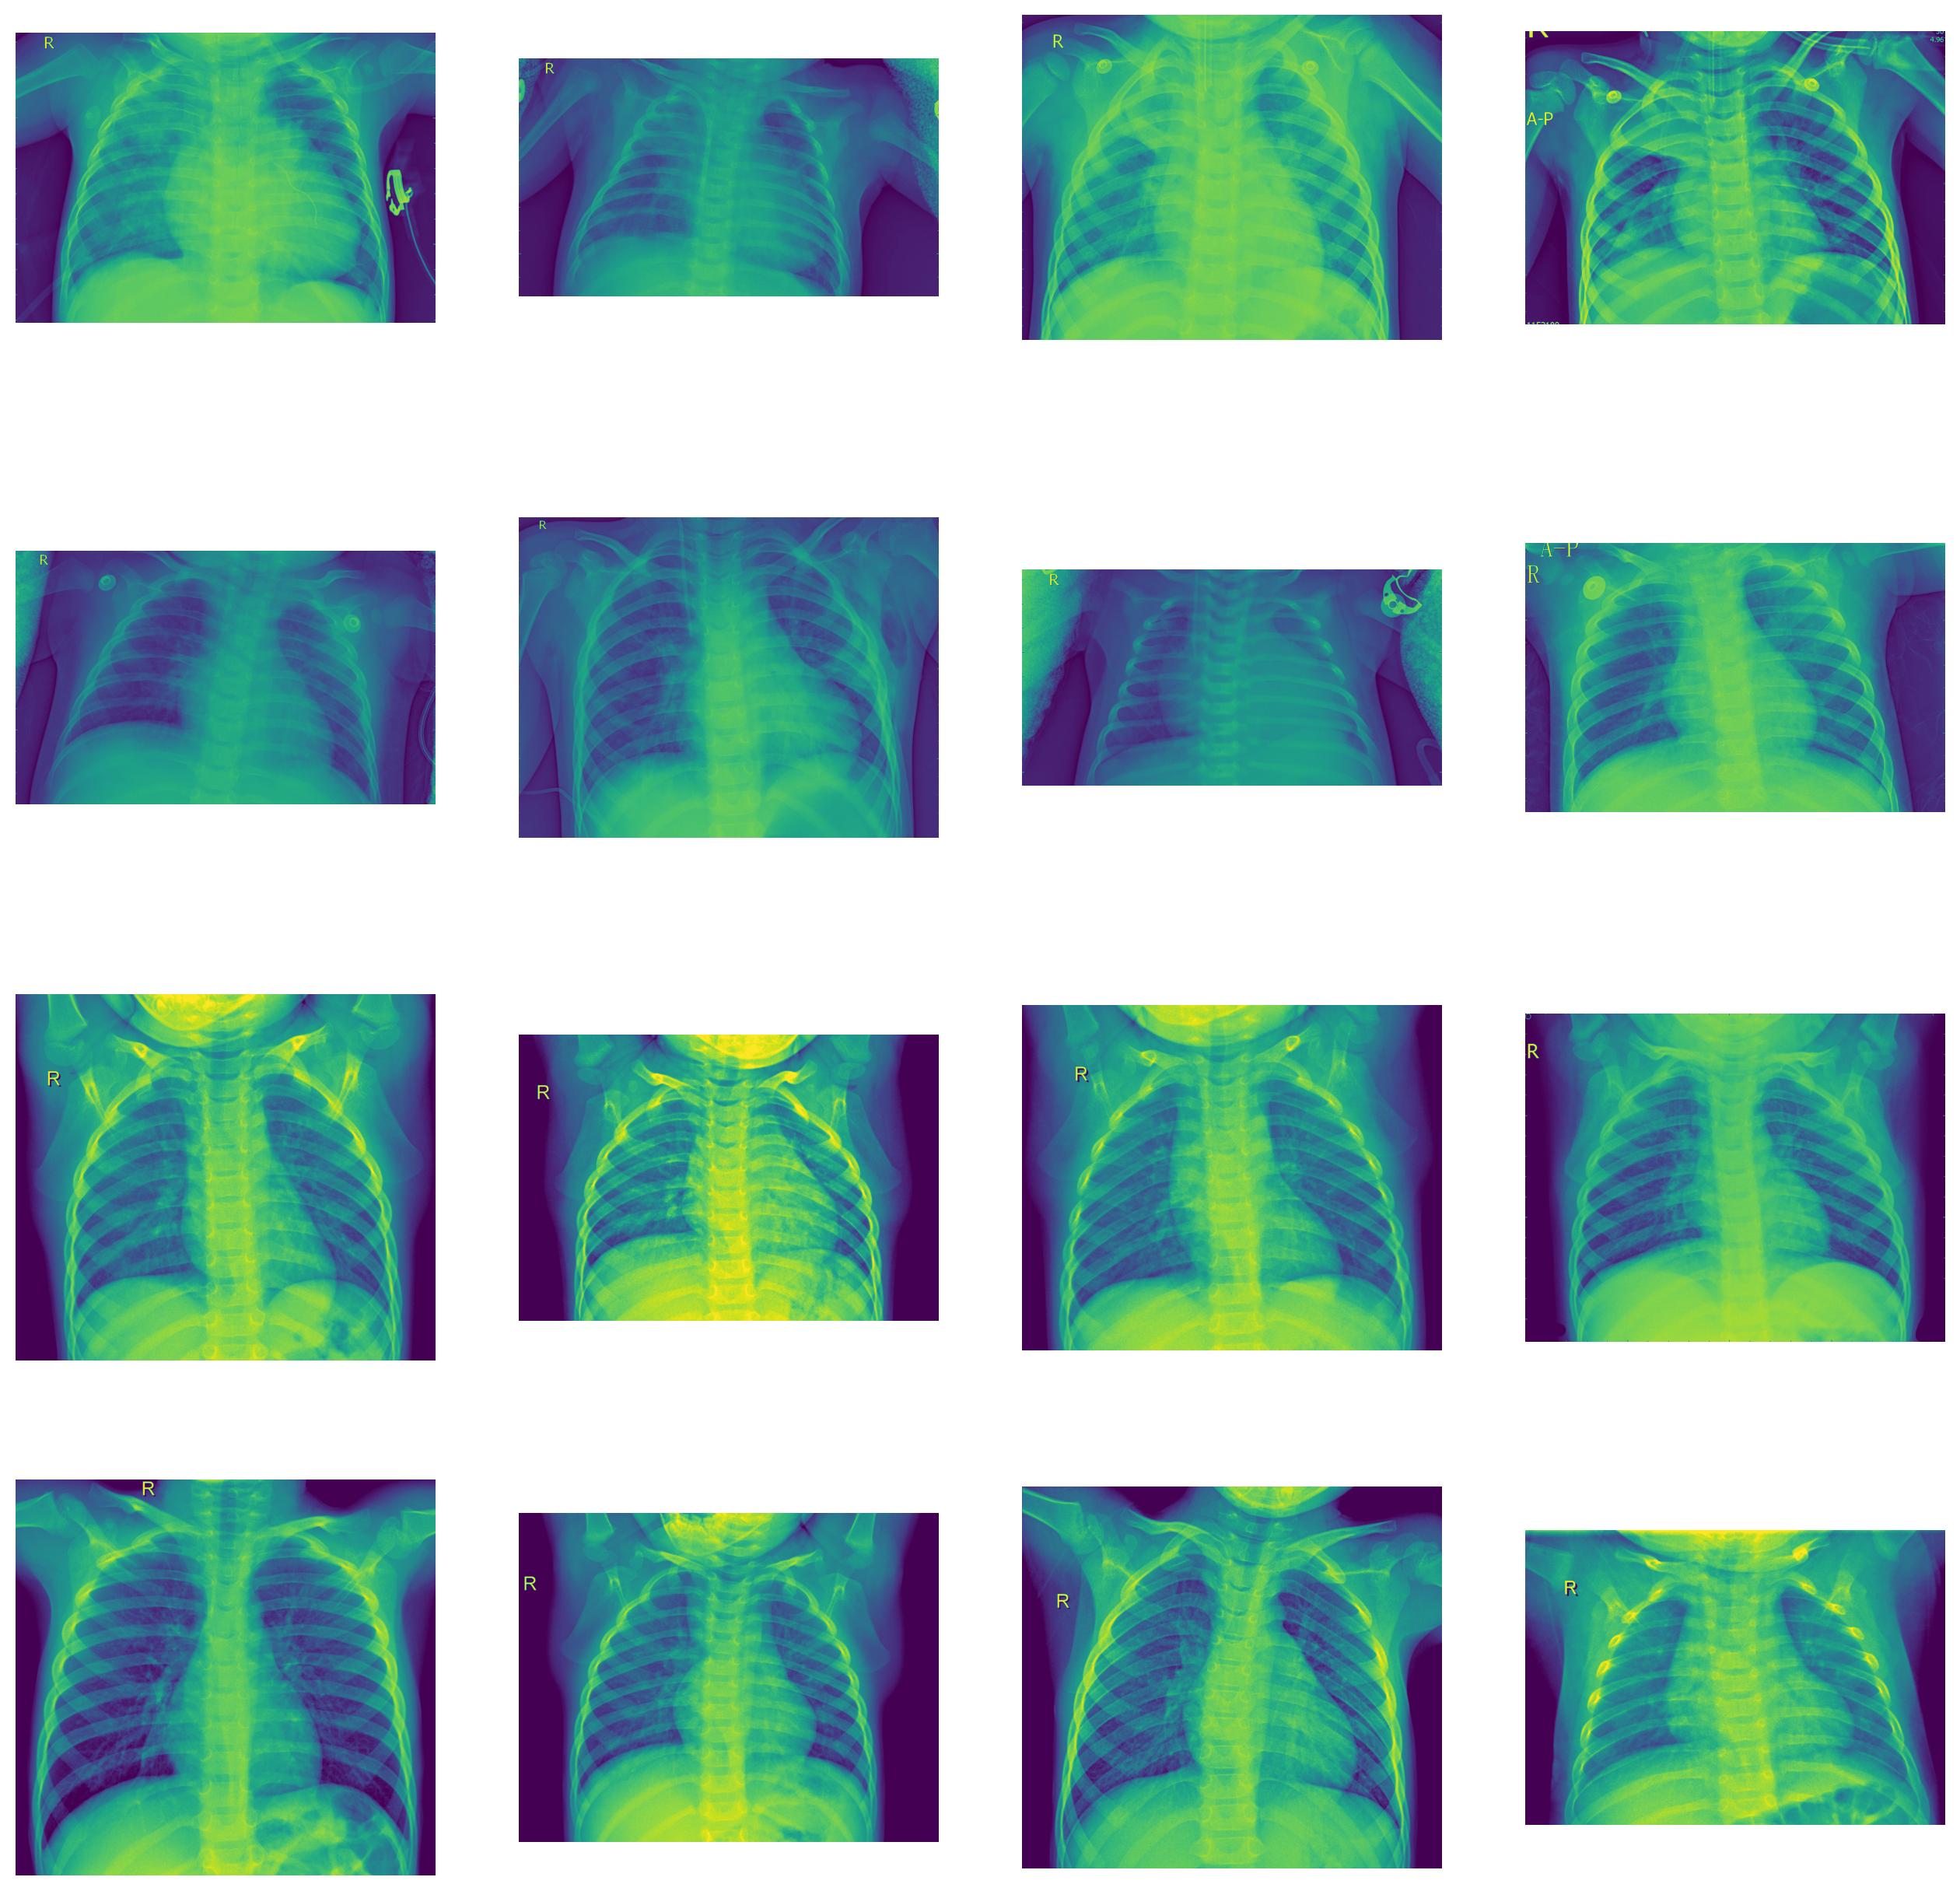

In [90]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_positive_pic = [os.path.join(train_positive_dir, fname)
                for fname in train_positive_names[pic_index-8:pic_index]]
next_negative_pic = [os.path.join(train_negative_dir, fname)
                for fname in train_negative_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_positive_pic + next_negative_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [91]:
# Importing other libraries
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, MaxPooling2D, BatchNormalization, Activation, Flatten, Dense

from keras import layers
from keras import models

import numpy as np

np.random.seed(1000)

In [92]:
# Creating a Sequential model
model = models.Sequential()
model.add(layers.Conv2D(32, (11, 11), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 214, 214, 32)      11648     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 71, 71, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 67, 67, 64)        51264     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 conv2d_63 (Conv2D)          (None, 18, 18, 256)     

In [93]:
# Compiling
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [94]:
from keras_preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'train',  # This is the source directory for training images
        classes = ['NORMAL', 'PNEUMONIA'],
        target_size=(224, 224),  # All images will be resized to 244x244 as required by alexnet
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'test',  # This is the source directory for training images
        classes = ['NORMAL', 'PNEUMONIA'],
        target_size = (224, 224),  # All images will be resized to 244x244 as required by alexnet
        batch_size = 19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [95]:
# Training the model
callback = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        mode="auto",
        restore_best_weights=True,
        patience=3
    ),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]


history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=20, validation_data=validation_generator, validation_steps=50)

/var/folders/qv/q_dnpbsx78g7jn1yd20blnl80000gn/T/ipykernel_1188/3085718295.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=20, validation_data=validation_generator, validation_steps=50)


Epoch 1/20
 25/100 [======>.......................] - ETA: 9:55 - loss: 14434.6670 - accuracy: 0.5671 

2023-02-19 18:21:13.434858: W tensorflow/core/framework/op_kernel.cc:1768] UNKNOWN: FileNotFoundError: [Errno 2] No such file or directory: 'train/PNEUMONIA/BACTERIA-8054264-0001.jpeg'
Traceback (most recent call last):

  File "/Users/tianyingzhu/opt/anaconda3/envs/medical-imaging-analytics/lib/python3.10/site-packages/tensorflow/python/ops/script_ops.py", line 271, in __call__
    ret = func(*args)

  File "/Users/tianyingzhu/opt/anaconda3/envs/medical-imaging-analytics/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/Users/tianyingzhu/opt/anaconda3/envs/medical-imaging-analytics/lib/python3.10/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 1035, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/Users/tianyingzhu/opt/anaconda3/envs/medical-imaging-analytics/lib/python3.10/site-packages/keras/engine/data_adapter.py", line 903, in wrapped_gener

 26/100 [======>.......................] - ETA: 9:51 - loss: 13870.8350 - accuracy: 0.5752

UnknownError: Graph execution error:

FileNotFoundError: [Errno 2] No such file or directory: 'train/PNEUMONIA/BACTERIA-8054264-0001.jpeg'
Traceback (most recent call last):

  File "/Users/tianyingzhu/opt/anaconda3/envs/medical-imaging-analytics/lib/python3.10/site-packages/tensorflow/python/ops/script_ops.py", line 271, in __call__
    ret = func(*args)

  File "/Users/tianyingzhu/opt/anaconda3/envs/medical-imaging-analytics/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/Users/tianyingzhu/opt/anaconda3/envs/medical-imaging-analytics/lib/python3.10/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 1035, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/Users/tianyingzhu/opt/anaconda3/envs/medical-imaging-analytics/lib/python3.10/site-packages/keras/engine/data_adapter.py", line 903, in wrapped_generator
    for data in generator_fn():

  File "/Users/tianyingzhu/opt/anaconda3/envs/medical-imaging-analytics/lib/python3.10/site-packages/keras/engine/data_adapter.py", line 1050, in generator_fn
    yield x[i]

  File "/Users/tianyingzhu/opt/anaconda3/envs/medical-imaging-analytics/lib/python3.10/site-packages/keras_preprocessing/image/iterator.py", line 65, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/Users/tianyingzhu/opt/anaconda3/envs/medical-imaging-analytics/lib/python3.10/site-packages/keras_preprocessing/image/iterator.py", line 227, in _get_batches_of_transformed_samples
    img = load_img(filepaths[j],

  File "/Users/tianyingzhu/opt/anaconda3/envs/medical-imaging-analytics/lib/python3.10/site-packages/keras_preprocessing/image/utils.py", line 113, in load_img
    with open(path, 'rb') as f:

FileNotFoundError: [Errno 2] No such file or directory: 'train/PNEUMONIA/BACTERIA-8054264-0001.jpeg'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_16777]

In [ ]:
from matplotlib import pyplot as plt

acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print("Training accuracy: ", acc)
print("Training loss: ", loss)

print("Validation accuracy: ", val_acc)
print("Validation loss: ", val_loss)

# Plotting the graphs to visualize the trend of accuracy and loss

epochs = range(1, len(history.history['accuracy'])+1)

plt.plot(epochs, history.history['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()